**In this notebook:** 
    
    - we plot the control effort (immunity theshold) for the targeted strategies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm
import math
import random

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

from scipy.integrate import odeint
from numpy import linalg as LA

from itertools import chain

import matplotlib.colors as mcolors
import copy

from matplotlib.patches import Rectangle

In [27]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# read population data

In [28]:
# # read population data

data_pop_grouped = pd.read_csv("./../data/pop_size_by_age_SEP_edu.csv")

dict_pop_full = dict(zip(data_pop_grouped[['age_group',
                           'sep_level', 'edu_level']].apply(lambda x:
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values,
                   data_pop_grouped['population']))
                   
pop_age = data_pop_grouped.groupby('age_group')['population'].sum()
pop_age = dict(zip(pop_age.index, pop_age.values))

distrib_pop = data_pop_grouped.groupby('age_group')['population'].sum()/data_pop_grouped['population'].sum()
distrib_pop = dict(zip(distrib_pop.index, distrib_pop.values))

In [29]:
order_groups = ['0-14, low SEP, low edu', 
                '0-14, high SEP, low edu',
                '15-24, low SEP, low edu', 
                '15-24, low SEP, high edu',
                '15-24, high SEP, low edu', 
                '15-24, high SEP, high edu',
                '25-64, low SEP, low edu', 
                '25-64, low SEP, high edu',
                '25-64, high SEP, low edu', 
                '25-64, high SEP, high edu',
                '65+, low SEP, low edu', 
                '65+, low SEP, high edu',
                '65+, high SEP, low edu', 
                '65+, high SEP, high edu']

In [30]:
R0 = 1.5

gen_imm_thr = (1-1/R0)

gen_imm_thr

0.33333333333333337

# plot control effort

In [49]:
susc_children = 1.0

In [50]:
matrix_features = pd.read_csv("./../output/matrices/10000_matrices_characteristics.csv")

In [51]:
effective_T4_strategies = pd.read_csv("./../output/epidemic_output/"+
                                      "effective_T4_strategies_susc_children{}.csv".format(susc_children))
effective_T8_strategies = pd.read_csv("./../output/epidemic_output/"+
                                      "effective_T8_strategies_susc_children{}.csv".format(susc_children))

In [52]:
effective_T4_strategies.head()

,combination,groups,target,size,rel_imm_thr,abs_imm_thr,index,ratio_egv_max,list_ass_sep_trace,list_ass_edu_trace,ratio_egv_max_quant,list_ass_sep_trace_quant,list_ass_edu_trace_quant,list_eigv_ratio_keep_sep,list_eigv_ratio_keep_edu
0,0,1,"high SEP, low edu",0.45,0.73,0.33,0,1.006346,1.209947,1.312709,0-20,40-60,80-100,1.002102,1.002776
1,3,1,"high SEP, low edu",0.45,0.67,0.30,3,1.006982,1.111644,1.195376,40-60,20-40,60-80,1.001920,1.002873
2,5,1,"high SEP, low edu",0.45,0.69,0.31,5,1.006569,1.218299,1.234187,20-40,40-60,60-80,1.001884,1.002885
3,8,1,"high SEP, low edu",0.45,0.75,0.34,8,1.006619,1.214785,1.232898,20-40,40-60,60-80,1.001940,1.002804
4,9,1,"high SEP, low edu",0.45,0.84,0.38,9,1.006708,0.995241,1.213375,20-40,0-20,60-80,1.001740,1.002629


In [53]:
effective_T8_strategies.head()

,combination,groups,target,size,rel_imm_thr,abs_imm_thr,index,ratio_egv_max,list_ass_sep_trace,list_ass_edu_trace,ratio_egv_max_quant,list_ass_sep_trace_quant,list_ass_edu_trace_quant,list_eigv_ratio_keep_sep,list_eigv_ratio_keep_edu
0,0,2,high SEP,0.69,0.53,0.37,0,1.006346,1.209947,1.312709,0-20,40-60,80-100,1.002102,1.002776
1,0,2,low edu,0.69,0.45,0.31,0,1.006346,1.209947,1.312709,0-20,40-60,80-100,1.002102,1.002776
2,1,2,high SEP,0.69,0.58,0.40,1,1.006850,1.232992,1.233100,40-60,60-80,60-80,1.002715,1.002874
3,1,2,low edu,0.69,0.45,0.31,1,1.006850,1.232992,1.233100,40-60,60-80,60-80,1.002715,1.002874
4,2,2,high SEP,0.69,0.88,0.61,2,1.006992,1.103313,1.205484,40-60,20-40,60-80,1.002333,1.002970


## strategies T4

high SEP, low edu 65.9
0.6 1.0
0.27 0.45


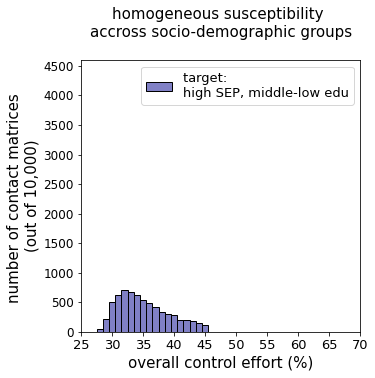

In [54]:
cols_targ = dict(zip(['low SEP, low edu', 'low SEP, high edu',
                      'high SEP, low edu', 'high SEP, high edu'], 
                     ["#C58080","#8B0000", "#8080C5","#00118B"]))

plt.figure(figsize=(5,5))

for target in effective_T4_strategies['target'].unique():
    df = effective_T4_strategies[effective_T4_strategies['target']==target]
    
    print(target, 100*len(df)/10000)
    print(df['rel_imm_thr'].min(), df['rel_imm_thr'].max())
    print(df['abs_imm_thr'].min(), df['abs_imm_thr'].max())
    
    plt.hist(100*df['abs_imm_thr'], label='target: \n{}'.format(target).replace("low edu", "middle-low edu"), edgecolor = "black",
             facecolor=cols_targ[target],
             bins=np.arange(0.5,100.5,1))
    
#plt.axvline(x=100*gen_imm_thr, label = 'generalised \nstrategy', color='black')
plt.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize=13)

plt.ylabel("number of contact matrices \n(out of 10,000)", fontsize=15)
plt.xticks(np.arange(25, 75, 5), fontsize=13)
plt.xlabel("overall control effort (%)", fontsize=15)
plt.xlim(25,70)

if susc_children == 1.0:
    plt.title('homogeneous susceptibility \naccross socio-demographic groups\n', fontsize=15)
    plt.yticks(np.arange(0,5100,500), fontsize=12)
    plt.ylim([0,4600])
elif susc_children == 0.5:
    plt.title('50% reduction \nin susceptibility for 0-14 y.o.\n', fontsize=15)
    plt.yticks(np.arange(0,600,100), fontsize=12)
    plt.ylim([0,550])
else:
    sys.exit()

plt.savefig("./../output/figures/T4_strategies_control_effort_susc_children{}.png".format(susc_children), 
            dpi=200, bbox_inches="tight")

plt.show()

## strategies T8

low edu 100.0
0.41 0.63
0.28 0.43
0.29 0.3 0.33
high edu 0.0
nan nan
nan nan
nan nan nan


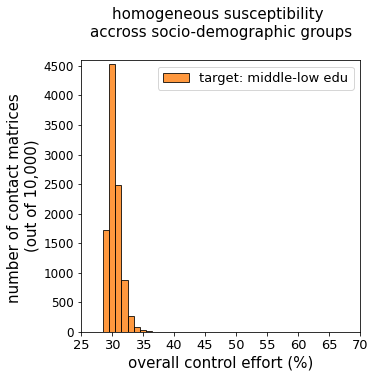

In [55]:
dict_col_targ2 = dict(zip(['low SEP', 'high SEP',
                          'low edu', 'high edu'], ["tab:red", "tab:blue", "tab:orange", "tab:green"]))


plt.figure(figsize=(5,5))

h = 0.1
for target in ['low edu','high edu']:
    df = effective_T8_strategies[effective_T8_strategies['target']==target]
    
    print(target, 100*len(df)/10000)
    print(df['rel_imm_thr'].min(), df['rel_imm_thr'].max())
    print(df['abs_imm_thr'].min(), df['abs_imm_thr'].max())
    print(df['abs_imm_thr'].quantile(0.025), df['abs_imm_thr'].quantile(0.5), df['abs_imm_thr'].quantile(0.975))

    
    if len(df)>0:
        plt.hist(100*df['abs_imm_thr'], 
             label='target: {}'.format(target).replace("low edu", "middle-low edu"), alpha = 0.8, 
             edgecolor="black", facecolor = dict_col_targ2[target], 
             bins=np.arange(0.5,100.5,1), zorder = 10 if target == "high edu" else 1)
    h+=0.2
    
#plt.axvline(x=100*gen_imm_thr, label = 'generalised strategy', color='black')
plt.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize=13)

plt.ylabel("number of contact matrices \n(out of 10,000)", fontsize=15)

plt.xticks(np.arange(25, 85, 5), fontsize=13)
plt.xlabel("overall control effort (%)", fontsize=15)

plt.xlim(25,70)

plt.yticks(np.arange(0,600,100), fontsize=12)
plt.ylim([0,550])

if susc_children == 1.0:
    plt.title('homogeneous susceptibility \naccross socio-demographic groups\n', fontsize=15)
    plt.yticks(np.arange(0,5100,500), fontsize=12)
    plt.ylim([0,4600])
elif susc_children == 0.5:
    plt.title('50% reduction \nin susceptibility for 0-14 y.o.\n', fontsize=15)
    plt.yticks(np.arange(0,600,100), fontsize=12)
    plt.ylim([0,550])
else:
    sys.exit()

plt.savefig("./../output/figures/T8_strategies_EDU_control_effort_susc_children{}.png".format(susc_children), 
            dpi=200, bbox_inches="tight")

plt.show()

In [56]:
df['abs_imm_thr'].mean()

nan

low SEP 6.01
0.87 1.0
0.27 0.31
high SEP 80.89
0.48 1.0
0.33 0.69


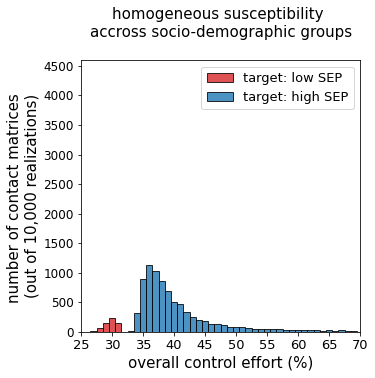

In [57]:
dict_col_targ2 = dict(zip(['low SEP', 'high SEP',
                          'low edu', 'high edu'], ["tab:red", "tab:blue", "tab:orange", "tab:green"]))


plt.figure(figsize=(5,5))

h = 0.1
for target in ['low SEP', 'high SEP']:
    df = effective_T8_strategies[effective_T8_strategies['target']==target]
    
    print(target, 100*len(df)/10000)
    print(df['rel_imm_thr'].min(), df['rel_imm_thr'].max())
    print(df['abs_imm_thr'].min(), df['abs_imm_thr'].max())
    
    if len(df)>0:
        plt.hist(100*df['abs_imm_thr'], 
             label='target: {}'.format(target), alpha = 0.8, 
             edgecolor="black", facecolor = dict_col_targ2[target], 
             bins=np.arange(0.5,100.5,1), zorder = 10 if target == "high edu" else 1)
    h+=0.2
    
#plt.axvline(x=100*gen_imm_thr, label = 'generalised strategy', color='black')
plt.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize=13)

plt.ylabel("number of contact matrices \n(out of 10,000 realizations)", fontsize=15)

plt.xticks(np.arange(25, 85, 5), fontsize=13)
plt.xlabel("overall control effort (%)", fontsize=15)

plt.xlim(25,70)

if susc_children == 1.0:
    plt.title('homogeneous susceptibility \naccross socio-demographic groups\n', fontsize=15)
    plt.yticks(np.arange(0,5100,500), fontsize=12)
    plt.ylim([0,4600])
elif susc_children == 0.5:
    plt.title('50% reduction \nin susceptibility for 0-14 y.o.\n', fontsize=15)
    plt.yticks(np.arange(0,600,100), fontsize=12)
    plt.ylim([0,550])
else:
    sys.exit()

plt.savefig("./../output/figures/T8_strategies_SEP_control_effort_susc_children{}.png".format(susc_children), 
            dpi=200, bbox_inches="tight")

plt.show()

# target sizes

In [58]:
pop_tot = sum([dict_pop_full[h] for h in dict_pop_full.keys()])

In [59]:
cols_targ

{'low SEP, low edu': '#C58080',
 'low SEP, high edu': '#8B0000',
 'high SEP, low edu': '#8080C5',
 'high SEP, high edu': '#00118B'}

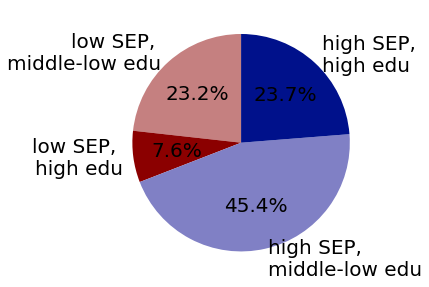

In [60]:
# Create pie chart
plt.figure(figsize=(5, 5))

sizes = []

for i,g in enumerate(['low SEP, low edu', 'low SEP, high edu',
                          'high SEP, low edu', 'high SEP, high edu']):
    
    size = 100*sum([dict_pop_full[h] for h in dict_pop_full.keys() if g in h])/pop_tot
    
    sizes.append(size)
    
# Labels and colors
labels = ['low SEP, \nmiddle-low edu', 'low SEP, \nhigh edu', 
          'high SEP, \nmiddle-low edu', 'high SEP, \nhigh edu']

plt.pie(sizes, labels=labels, 
        colors=[cols_targ[c] for c in ['low SEP, low edu', 'low SEP, high edu',
                                      'high SEP, low edu', 'high SEP, high edu']], 
                autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

#plt.title("population distribution", fontsize=20)

# Save or show
plt.savefig("./../output/figures/population_pie_chart_SEP_EDU.png", dpi=200, bbox_inches="tight")

plt.show()

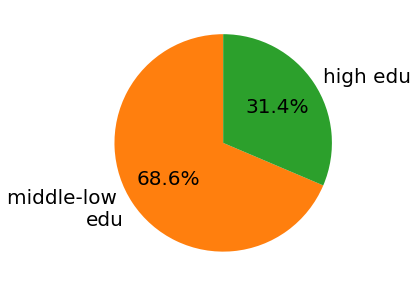

In [61]:
# Create pie chart
plt.figure(figsize=(5, 5))

sizes = []

for i,g in enumerate(['low edu', 'high edu']):
    
    size = 100*sum([dict_pop_full[h] for h in dict_pop_full.keys() if g in h])/pop_tot
    
    sizes.append(size)

labels = ['middle-low \nedu', 'high edu']

plt.pie(sizes, labels=labels, 
        colors= [dict_col_targ2[c] for c in ['low edu', 'high edu']], 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

#plt.title("population distribution", fontsize=20)

# Save or show
plt.savefig("./../output/figures/population_pie_chart_EDU.png", dpi=200, bbox_inches="tight")

plt.show()

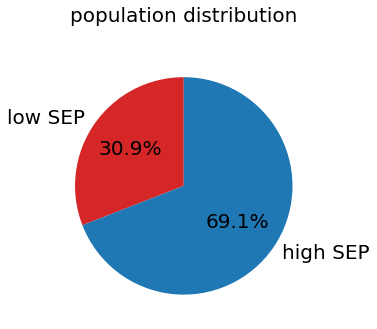

In [62]:
# Create pie chart
plt.figure(figsize=(5, 5))

sizes = []

labels = ['low SEP', 'high SEP']

for i,g in enumerate(labels):
    
    size = 100*sum([dict_pop_full[h] for h in dict_pop_full.keys() if g in h])/pop_tot
    
    sizes.append(size)
    
plt.pie(sizes, labels=labels, 
        colors= [dict_col_targ2[c] for c in labels], 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

plt.title("population distribution\n", fontsize=20)

# Save or show
plt.savefig("./../output/figures/population_pie_chart_SEP.png", 
            dpi=200, bbox_inches="tight")
plt.show()

# probability of success

low SEP 6.01
high SEP 80.89
low edu 100.0
high edu 0.0
high SEP, low edu 65.9


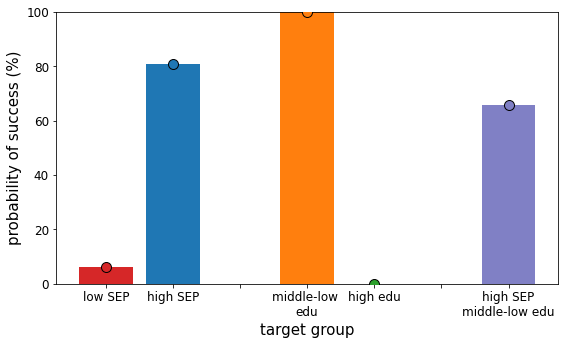

In [63]:
plt.figure(figsize=(9,5))

label_targets = []

pos = 0
    
for target in ['low SEP', 'high SEP']:
    
    df = effective_T8_strategies[effective_T8_strategies['target']==target]
    
    prob_succ = 100*len(df)/10000
    
    df = df['abs_imm_thr']<(1-1/R0)
    
    print(target, prob_succ)
    
    plt.bar(pos, prob_succ, color=dict_col_targ2[target])
    plt.scatter(pos, prob_succ, facecolor=dict_col_targ2[target], edgecolor="black", zorder=10, s=100)

    
    pos +=1
    
    label_targets.append(target)

pos +=1
    
label_targets.append('')

    
for target in ['low edu', 'high edu']:
    
    df = effective_T8_strategies[effective_T8_strategies['target']==target]
    
    prob_succ = 100*len(df)/10000
    
    df = df['abs_imm_thr']<(1-1/R0)
    
    print(target, prob_succ)
    
    plt.bar(pos, prob_succ, color=dict_col_targ2[target])
    plt.scatter(pos, prob_succ, facecolor=dict_col_targ2[target], edgecolor="black", zorder=10, s=100)
    
    pos +=1
    
    label_targets.append(target.replace("low edu", "middle-low \nedu"))
    
label_targets.append('')
    
pos +=1
    
for target in effective_T4_strategies['target'].unique():
    df = effective_T4_strategies[effective_T4_strategies['target']==target]
    
    prob_succ = 100*len(df)/10000
    
    print(target, prob_succ)
    
    plt.bar(pos, prob_succ, color=cols_targ[target])
    plt.scatter(pos, prob_succ, facecolor=cols_targ[target], edgecolor="black", zorder=10, s=100)
    
    pos +=1
    
    label_targets.append(target.replace(", ", "\n").replace("low edu", "middle-low edu"))

    
plt.xlabel("target group", fontsize=15)
plt.ylabel("probability of success (%)", fontsize=15)

plt.xticks(np.arange(pos), labels = label_targets, fontsize=12)

if susc_children == 0.5:
    plt.yticks(np.arange(0,101,5), fontsize=14)
    plt.ylim([0,50])
else:
    plt.yticks(np.arange(0,101,20), fontsize=12)
    plt.ylim([0,100])

plt.savefig("./../output/figures/probability_of_success_susc_children{}.png".format(susc_children), 
            dpi=200, bbox_inches="tight")

plt.show()

# control effort, heatmap

In [64]:
# Truncate the colormap
def truncate_colormap(cmap, min_val=0.0, max_val=1.0, n_colors=256):
    """
    Truncate a colormap to only include colors between min_val and max_val.
    """
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{min_val:.2f},{max_val:.2f})',
        cmap(np.linspace(min_val, max_val, n_colors))
    )
    return new_cmap

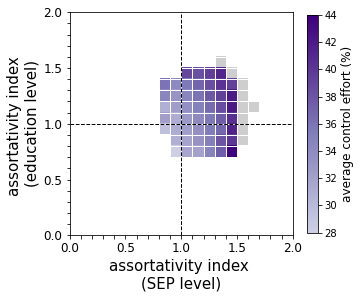

In [65]:
# Create a 2D histogram (heatmap)
x_bins = np.arange(0, 2.1, 0.1)  # Bins for x-axis
y_bins = np.arange(0, 2.1, 0.1)  # Bins for y-axis

for target in effective_T4_strategies['target'].unique():
    
    plt.figure(figsize=(5, 5))
    
    # bottom grid 
    
    res = matrix_features.copy()
    heatmap_data = np.zeros((len(x_bins) - 1, len(y_bins) - 1))
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            mask = (
                (res['list_ass_sep_trace'] >= x_bins[i]) & (res['list_ass_sep_trace'] < x_bins[i + 1]) &
                (res['list_ass_edu_trace'] >= y_bins[j]) & (res['list_ass_edu_trace'] < y_bins[j + 1])
            )
            heatmap_data[i, j] = 1. if not len(res.loc[mask])==0 else np.nan
    # Mask cells with a frequency of 0
    masked_heatmap = np.ma.masked_where(heatmap_data == 0, heatmap_data)
    
    # Custom colormap: set masked values to white
    cmap = copy.copy(matplotlib.cm.get_cmap("Greys"))  # Base colormap
    cmap = truncate_colormap(cmap, min_val=0.3, max_val=1.0)
    cmap.set_bad(color="white", alpha = 0.3)  # Color for masked cells (frequency = 0)
    
    plt.imshow(
        masked_heatmap.T,  # Transpose to align axes correctly
        origin="lower",  # Place (0, 0) at the bottom-left
        extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],  # Set axis limits
        cmap=cmap,  # Apply the colormap
    )
    
    # top grid
    
    df = effective_T4_strategies[effective_T4_strategies['target']==target]

    res = df.copy()

    #heatmap, x_edges, y_edges = np.histogram2d(res['list_ass_sep_trace'], res['list_ass_edu_trace'], 
    #                                           bins=[x_bins, y_bins])
    
    # Compute average 'abs_imm_thr' per bin
    heatmap_data = np.zeros((len(x_bins) - 1, len(y_bins) - 1))
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            mask = (
                (res['list_ass_sep_trace'] >= x_bins[i]) & (res['list_ass_sep_trace'] < x_bins[i + 1]) &
                (res['list_ass_edu_trace'] >= y_bins[j]) & (res['list_ass_edu_trace'] < y_bins[j + 1])
            )
            values = 100*res.loc[mask, 'abs_imm_thr']
            heatmap_data[i, j] = values.mean() if not values.empty else np.nan

    # Mask cells with a frequency of 0
    masked_heatmap = np.ma.masked_where(heatmap_data == 0, heatmap_data)

    # Custom colormap: set masked values to white
    cmap = copy.copy(matplotlib.cm.get_cmap("Purples"))  # Base colormap
    cmap = truncate_colormap(cmap, min_val=0.3, max_val=1.0)
    cmap.set_bad(color=(1, 1, 1, 0))  # Color for masked cells (frequency = 0)

    # Plot the heatmap
    plt.imshow(
        masked_heatmap.T,  # Transpose to align axes correctly
        origin="lower",  # Place (0, 0) at the bottom-left
        extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],  # Set axis limits
        cmap=cmap,  # Apply the colormap
    )

    cbar = plt.colorbar(label="average control effort (%)", shrink = 0.8)  # Add colorbar
    cbar.ax.set_ylabel("average control effort (%)", fontsize=12)  # Set label size


    # Add grid and labels
    plt.grid(color="white", linestyle="-", linewidth=1, alpha=1)
    plt.xlabel("assortativity index \n(SEP level)", fontsize=15)
    plt.ylabel("assortativity index \n(education level)", fontsize=15)
    plt.xticks(np.arange(0, 2.1, 0.1), labels = [x if x in np.arange(0, 2.1, 0.5) else ' ' 
                                                 for x in np.arange(0, 2.1, 0.1) ], 
               fontsize=12)
    plt.yticks(np.arange(0, 2.1, 0.1), labels = [x if x in np.arange(0, 2.1, 0.5) else ' ' 
                                                 for x in np.arange(0, 2.1, 0.1) ], 
               fontsize=12)

    # Add black lines at (1, 1)
    plt.axvline(x=1, color="black", linestyle="--", linewidth=1)
    plt.axhline(y=1, color="black", linestyle="--", linewidth=1)

    # Add the small square for frequency = 0
    cbar_ax = cbar.ax  # Get the colorbar axis
    #x0, y0, width, height = cbar_ax.get_position().bounds  # Get the bounds of the colorbar
    #square_height = height * 0.05  # Height for the small square

    # Add the square with a black edge and white facecolor
    #small_square_ax = plt.gcf().add_axes([x0, y0 - square_height-0.02, width, square_height], frame_on=False)
    #plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, facecolor="lightgray", alpha = 0.3, edgecolor="black", transform=plt.gca().transAxes))
    #plt.gca().text(2, 0.5, "0", ha="center", va="center", transform=plt.gca().transAxes, fontsize=10)
    #small_square_ax.spines['bottom'].set_visible(False)  # Hide axes spines
    #small_square_ax.set_xticks([])  # Hide x-axis ticks
    #small_square_ax.set_yticks([])  # Hide y-axis ticks
    #small_square_ax.set_xticklabels([])  # Hide x-axis labels
    #small_square_ax.set_yticklabels([])  # Hide y-axis labels

    # Save and display
    #plt.savefig("./heatmap_assortativity.png", dpi=200, bbox_inches="tight")
    plt.savefig("./../output/figures/assortativity_plane_heatmap_target{}_susc_children{}.png".format(target, susc_children), 
                dpi=200, bbox_inches="tight")

    plt.show()

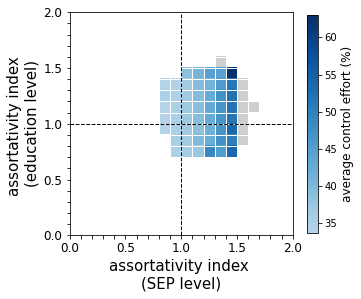

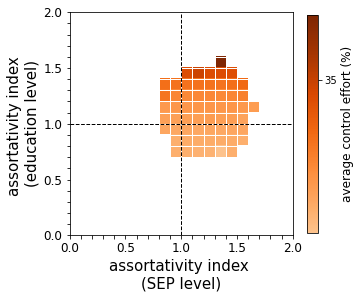

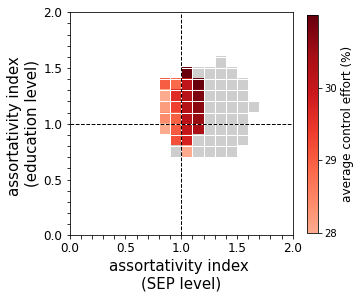

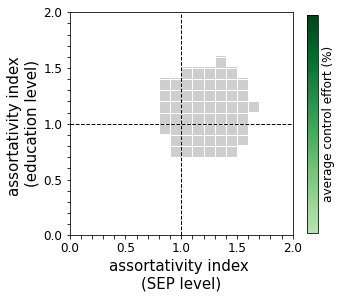

In [66]:
# Create a 2D histogram (heatmap)
x_bins = np.arange(0, 2.1, 0.1)  # Bins for x-axis
y_bins = np.arange(0, 2.1, 0.1)  # Bins for y-axis

for target in ['high SEP', 'low edu', 'low SEP', 'high edu']:
    
    plt.figure(figsize=(5, 5))
    
    # bottom grid 
    
    res = matrix_features.copy()
    heatmap_data = np.zeros((len(x_bins) - 1, len(y_bins) - 1))
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            mask = (
                (res['list_ass_sep_trace'] >= x_bins[i]) & (res['list_ass_sep_trace'] < x_bins[i + 1]) &
                (res['list_ass_edu_trace'] >= y_bins[j]) & (res['list_ass_edu_trace'] < y_bins[j + 1])
            )
            heatmap_data[i, j] = 1. if not len(res.loc[mask])==0 else np.nan
    # Mask cells with a frequency of 0
    masked_heatmap = np.ma.masked_where(heatmap_data == 0, heatmap_data)
    
    # Custom colormap: set masked values to white
    cmap = copy.copy(matplotlib.cm.get_cmap("Greys"))  # Base colormap
    cmap = truncate_colormap(cmap, min_val=0.3, max_val=1.0)
    cmap.set_bad(color="white", alpha = 0.3)  # Color for masked cells (frequency = 0)
    
    plt.imshow(
        masked_heatmap.T,  # Transpose to align axes correctly
        origin="lower",  # Place (0, 0) at the bottom-left
        extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],  # Set axis limits
        cmap=cmap,  # Apply the colormap
    )
    
    # top grid
    
    df = effective_T8_strategies[effective_T8_strategies['target']==target]

    res = df.copy()

    #heatmap, x_edges, y_edges = np.histogram2d(res['list_ass_sep_trace'], res['list_ass_edu_trace'], 
    #                                           bins=[x_bins, y_bins])
    
    # Compute average 'abs_imm_thr' per bin
    heatmap_data = np.zeros((len(x_bins) - 1, len(y_bins) - 1))
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            mask = (
                (res['list_ass_sep_trace'] >= x_bins[i]) & (res['list_ass_sep_trace'] < x_bins[i + 1]) &
                (res['list_ass_edu_trace'] >= y_bins[j]) & (res['list_ass_edu_trace'] < y_bins[j + 1])
            )
            values = 100*res.loc[mask, 'abs_imm_thr']
            heatmap_data[i, j] = values.mean() if not values.empty else np.nan

    # Mask cells with a frequency of 0
    masked_heatmap = np.ma.masked_where(heatmap_data == 0, heatmap_data)


    if target == "low SEP":
        gradient = 'Reds'
        ticks_colorbar = np.arange(28, 31, 1)
    elif target == 'high SEP':
        gradient = 'Blues'
        ticks_colorbar = np.arange(35, 65, 5)
    elif target == 'low edu':
        gradient = 'Oranges'
        ticks_colorbar = np.arange(35, 65, 5)
    elif target == 'high edu':
        gradient = 'Greens'
        ticks_colorbar = [30.8, 30.9, 31.]
    else:
        sys.exit()
    # Custom colormap: set masked values to white
    cmap = copy.copy(matplotlib.cm.get_cmap(gradient))  # Base colormap
    cmap = truncate_colormap(cmap, min_val=0.3, max_val=1.0)
    cmap.set_bad(color=(1, 1, 1, 0))  # Color for masked cells (frequency = 0)

    # Plot the heatmap

    plt.imshow(
        masked_heatmap.T,  # Transpose to align axes correctly
        origin="lower",  # Place (0, 0) at the bottom-left
        extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],  # Set axis limits
        cmap=cmap, # Apply the colormap
    )

    cbar = plt.colorbar(shrink = 0.8, 
                       ticks=ticks_colorbar)  # Add colorbar
    
    cbar.ax.set_ylabel("average control effort (%)", fontsize=12)  # Set label size

    # Add grid and labels
    plt.grid(color="white", linestyle="-", linewidth=1, alpha=1, zorder = 15)
    plt.xlabel("assortativity index \n(SEP level)", fontsize=15)
    plt.ylabel("assortativity index \n(education level)", fontsize=15)
    plt.xticks(np.arange(0, 2.1, 0.1), labels = [x if x in np.arange(0, 2.1, 0.5) else ' ' 
                                                 for x in np.arange(0, 2.1, 0.1) ], 
               fontsize=12)
    plt.yticks(np.arange(0, 2.1, 0.1), labels = [x if x in np.arange(0, 2.1, 0.5) else ' ' 
                                                 for x in np.arange(0, 2.1, 0.1) ], 
               fontsize=12)

    # Add black lines at (1, 1)
    plt.axvline(x=1, color="black", linestyle="--", linewidth=1)
    plt.axhline(y=1, color="black", linestyle="--", linewidth=1)

    # Add the small square for frequency = 0
    #cbar_ax = cbar.ax  # Get the colorbar axis
    #x0, y0, width, height = cbar_ax.get_position().bounds  # Get the bounds of the colorbar
    #square_height = height * 0.05  # Height for the small square

    # Add the square with a black edge and white facecolor
    #small_square_ax = plt.gcf().add_axes([x0, y0 - square_height-0.02, width, square_height], frame_on=False)
    #plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, facecolor="lightgray", alpha = 0.3, edgecolor="black", transform=plt.gca().transAxes))
    #plt.gca().text(2, 0.5, "ineffective", ha="center", va="center", transform=plt.gca().transAxes, fontsize=10)
    #small_square_ax.spines['bottom'].set_visible(False)  # Hide axes spines
    #small_square_ax.set_xticks([])  # Hide x-axis ticks
    #small_square_ax.set_yticks([])  # Hide y-axis ticks
    #small_square_ax.set_xticklabels([])  # Hide x-axis labels
    #small_square_ax.set_yticklabels([])  # Hide y-axis labels

    # Save and display
    #plt.savefig("./heatmap_assortativity.png", dpi=200, bbox_inches="tight")
    plt.savefig("./../output/figures/assortativity_plane_heatmap_target{}_susc_children{}.png".format(target, susc_children), 
                dpi=200, bbox_inches="tight")

    plt.show()